**ANÁLISE DOS DISCENTES DA UFRN SEGUNDO PERSPECTIVAS DE GÊNERO E ETNIA**

<br>OS DADOS UTIIZADOS FORAM DISPONIBILIZADOS PELA INSTITUIÇÃO NA FORMA DE DATASETS
<br>PERÍODO 2009 - 2019

<br>**Componentes:**
<br>Fernanda Laís Pereira de Souza
<br>Carmem Stefanie da Silva Cavalcante

###Inicialização dos Dados


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#Lendo CSVs de 2009 até 2019
csv_2009 = pd.read_csv("discentes-2009.csv", sep=";")
csv_2010 = pd.read_csv("discentes-2010.csv", sep=";")
csv_2011 = pd.read_csv("discentes-2011.csv", sep=";")
csv_2012 = pd.read_csv("discentes-2012.csv", sep=";")
csv_2013 = pd.read_csv("discentes-2013.csv", sep=";")
csv_2014 = pd.read_csv("discentes-2014.csv", sep=";")
csv_2015 = pd.read_csv("discentes-2015.csv", sep=";")
csv_2016 = pd.read_csv("discentes-2016.csv", sep=";")
csv_2017 = pd.read_csv("discentes-2017.csv", sep=";")
csv_2018 = pd.read_csv("discentes-2018.csv", sep=";")
csv_2019 = pd.read_csv("discentes-2019.csv", sep=";")

In [2]:
#Juntando os Datasets
dados_ufrn = pd.concat([csv_2009, csv_2010, csv_2011, csv_2012, csv_2013, 
                        csv_2014, csv_2015, csv_2016, csv_2017, csv_2018,
                       csv_2019])
dados_ufrn.tail()


,matricula,nome_discente,sexo,raca,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
12459,2.019000e+10,ZEUS JUSTINO DE LIMA,M,Pardo,2019,1.0,REINGRESSO SEGUNDO CICLO,REGULAR,ATIVO,G,GRADUAÇÃO,85341136.0,ENGENHARIA BIOMÉDICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
12460,2.019012e+10,ZIDNEY MARINHO OLIVEIRA DE MELLO,M,Branco,2019,2.0,SiSU,REGULAR,CADASTRADO,G,GRADUAÇÃO,118835329.0,JORNALISMO,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
12461,2.019101e+10,ZILANA TEIXEIRA MARCELINO,F,Pardo,2019,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,E,MESTRADO,315745.0,MESTRADO EM EDUCAÇÃO,PRESENCIAL,363.0,PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO,5965.0,CENTRO DE EDUCAÇÃO
12462,2.019006e+10,ZIPORA AZENATE ALVES PEREIRA,F,Pardo,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000063.0,PEDAGOGIA,PRESENCIAL,5965.0,CENTRO DE EDUCAÇÃO,5965.0,CENTRO DE EDUCAÇÃO
12463,2.019012e+10,ZUILANE GOMES VIEIRA,F,Branco,2019,2.0,SiSU,REGULAR,CADASTRADO,G,GRADUAÇÃO,2000058.0,NUTRIÇÃO,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


###Escolha dos dados

In [0]:
#Separação do banco de dados em dois, divididos entre alunos de Graduação e Pós-Graduação

graduacao = dados_ufrn[dados_ufrn["nivel_ensino"] == "GRADUAÇÃO"].dropna()

pos_grad = dados_ufrn[dados_ufrn["nivel_ensino"].isin(['LATO SENSU', 'MESTRADO', 'DOUTORADO', 'RESIDÊNCIA', 'STRICTO SENSU'])].dropna()


In [0]:
#Pegar 5 cursos de cada centro - Graduação
centros = graduacao["nome_unidade"].value_counts().index
cursos_escolhidos = []

for centro in centros:
  selection = graduacao[graduacao["nome_unidade"] == centro]
  
  for i in range(5):
    #Pegar, por 5 vezes, um curso aleatorio entre os cursos de cada centro
    sample = selection['nome_curso'].sample(1, random_state=i)
    
    #Guarda os curso selecionados em uma lista 
    cursos_escolhidos.append(sample.iloc[0])
  

#Faz uma análise booleana de se o cursos de cada linha de 'graduação' está
#entre os cursos escolhidos
dados_cursos = graduacao["nome_curso"].isin(cursos_escolhidos)

#Filtra em um novo dataset apenas as linhas que contém os cursos escolhidos
#(onde dados_cursos == True)
new_grad = graduacao[dados_cursos]

#Apenas para visualização dos cursos
new_grad["nome_curso"].value_counts().sort_index(ascending = True)
 



In [5]:
#Separação dos alunos que participam dos 5 programas de pesquisa escolhidos

programas = ['PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA']

pos_aux = pos_grad["nome_unidade"].isin(programas)
new_pos = pos_grad[pos_aux]

new_pos["nome_unidade"].value_counts().sort_index(ascending = True)


PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA                           73
PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE                   85
PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO     855
PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS    100
PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO                   506
Name: nome_unidade, dtype: int64

##Análise por Gênero

###Parte 1

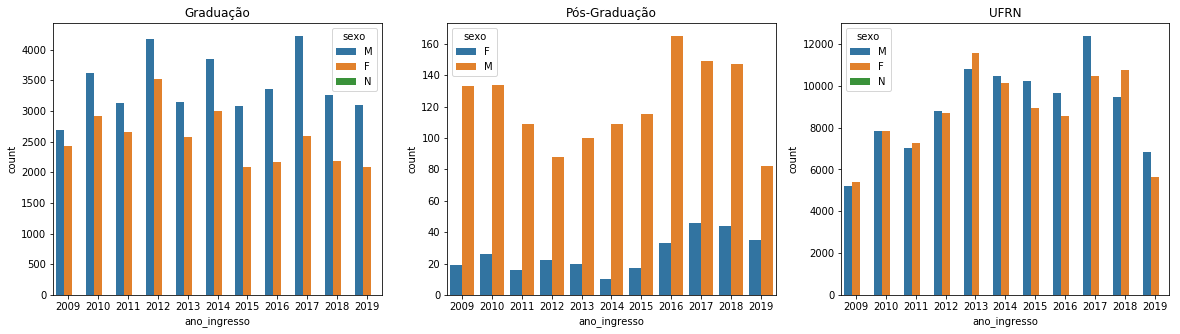

In [22]:
import seaborn as sns
fig, ax = plt.subplots(1,3,figsize=(20, 5))

sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = new_grad, ax=ax[0])
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = new_pos, ax=ax[1])
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = dados_ufrn, ax=ax[2])

ax[0].set_title("Graduação")
ax[1].set_title("Pós-Graduação")
ax[2].set_title("UFRN")

plt.show()


####Resultado da análise
Em todos os casos, há uma predominância de pessoas de ingressantes do sexo masculino ao longo dos anos. Desde o ano de 2015 observa-se um crescimento no ingresso feminino que não perdura-se e apresenta queda novamente a partir de 2018. Já em Pós-Graduação, apesar de haver um notável aumento desde o ano de 2014, em 2018 os números caem novamente de forma não tão acentuada. <br>
Mesmo sendo percebida uma constância maior nos índices de pós-graduação, é observado que as mulheres, em sua grande maioria não continuam a vida acadêmica, ingressando em especializações e cursos de pós-graduação, revelando que barreiras à educação foram ultrapassadas, no entanto, a dedicação prolongada à vida acadêmica ainda não alcança índices igualitários.<br>
Na UFRN como um todo, a ultrapassagem de mulheres ao número de homens aconteceu apenas 2 vezes ao longo dos anos registrados em nosso dataset, no ano de 2013 e 2018, de resto, em geral a diferença de constância entre gêneros não difere muito, porém é entendido que há maior predominância de gêneros em cursos específicos.


###Parte 2

<strong>Análise por porcentagem</strong>

In [49]:
#Análise por porcentagem

#Lista dos anos
anos = dados_ufrn["ano_ingresso"].value_counts().sort_index().index

#Lista dos dataset
dataset = [new_grad, new_pos, dados_ufrn]

porc_graduacao = {}
porc_pos = {}
porc_ufrn = {}
porc_graduacao_f = {}
porc_pos_f = {}
porc_ufrn_f = {}

#Lista dos dicionários
dicionarios = [porc_graduacao, porc_pos, porc_ufrn]
dicionarios_f = [porc_graduacao_f, porc_pos_f, porc_ufrn_f]

for ano in anos:
  #Para cada ano, vai avaliar pra cada um dos datasets e salvar em seu respectivo dicionário
  for i in range(3):
    data = dataset[i]
    
    #Filtrando pelo ano
    selection = data[data["ano_ingresso"] == ano]
    
    #Vendo quantos homens e mulheres teve de ingressantes em cada ano, e botando
    #sempre o de maior quantidade em primeiro lugar (o sort values)
    quant = selection["sexo"].value_counts().sort_values(ascending=False)
    
    #Porcentagens de homens e mulheres ingressantes em cada ano, em cada dataset
    porc_masc = quant[quant.index == "M"]/len(selection) * 100
    
    dicio = dicionarios[i]
    dicio_f = dicionarios_f[i]
    dicio[ano] = porc_masc
    dicio_f[ano] = 100 - porc_masc

print(porc_graduacao)
print(porc_pos)
print(porc_ufrn)


{2009: M    52.515169
Name: sexo, dtype: float64, 2010: M    55.363692
Name: sexo, dtype: float64, 2011: M    54.101765
Name: sexo, dtype: float64, 2012: M    54.137976
Name: sexo, dtype: float64, 2013: M    54.968509
Name: sexo, dtype: float64, 2014: M    56.163384
Name: sexo, dtype: float64, 2015: M    59.689622
Name: sexo, dtype: float64, 2016: M    60.779692
Name: sexo, dtype: float64, 2017: M    61.915237
Name: sexo, dtype: float64, 2018: M    59.919103
Name: sexo, dtype: float64, 2019: M    59.772333
Name: sexo, dtype: float64}
{2009: M    87.5
Name: sexo, dtype: float64, 2010: M    83.75
Name: sexo, dtype: float64, 2011: M    87.2
Name: sexo, dtype: float64, 2012: M    80.0
Name: sexo, dtype: float64, 2013: M    83.333333
Name: sexo, dtype: float64, 2014: M    91.596639
Name: sexo, dtype: float64, 2015: M    87.121212
Name: sexo, dtype: float64, 2016: M    83.333333
Name: sexo, dtype: float64, 2017: M    76.410256
Name: sexo, dtype: float64, 2018: M    76.963351
Name: sexo, dtyp

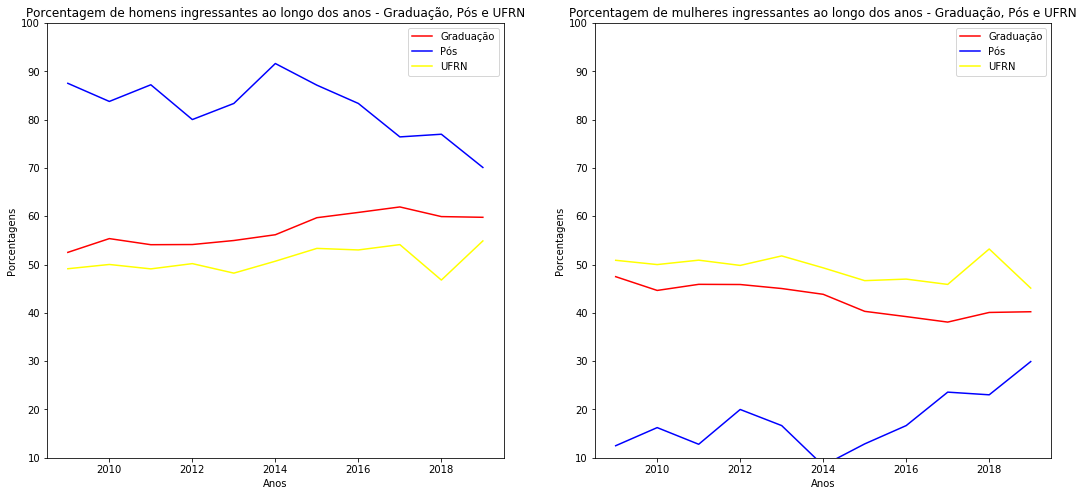

In [64]:
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


data = [porc_graduacao, porc_pos, porc_ufrn]
data_f = [porc_graduacao_f, porc_pos_f, porc_ufrn_f]


colors = ["red", "blue", "yellow"]


for i in range(3):
  ax1.plot(data[i].keys(), data[i].values(), color = colors[i])

for i in range(3):
  ax2.plot(data_f[i].keys(), data_f[i].values(), color = colors[i])

ax1.legend(['Graduação', 'Pós', 'UFRN'], loc=1)
ax1.set_title("Porcentagem de homens ingressantes ao longo dos anos - Graduação, Pós e UFRN")
ax1.set_xlabel("Anos")
ax1.set_ylabel("Porcentagens")
ax1.set_ylim(10,100)

ax2.legend(['Graduação', 'Pós', 'UFRN'], loc=1)
ax2.set_title("Porcentagem de mulheres ingressantes ao longo dos anos - Graduação, Pós e UFRN")
ax2.set_xlabel("Anos")
ax2.set_ylabel("Porcentagens")
ax2.set_ylim(10,100)

plt.show()

###Resultado da análise por porcentagens
<br><br>
Verificamos que a análise de dados por meio de porcentagens ao longo de um período demonstra um espelhamento de comportamento, escolhemos mostrar os dados masculinos e femininos lado a lado de modo que a discrepância entre o ingresso dos gêneros se manifeste. 
<br>
Para tanto, analisando os quantitavos relativos aos cursos de graduação, a igualdade encontra-se quase presente, em níveis saudáveis de ingresso, desta forma é saliente que grande parte das mulheres pretende iniciar uma carreira qualificada, chegando a escolher uma área específica no campo do trabalho.
<br>
Verifica-se novamente que os números de pós-graduação apresentam as menores quantidades, tendo em 2014 uma porcentagem abaixo de 10% dos ingressos, reafirmando que em geral as mulheres não continuam a vida acadêmica para além dos cursos de graduação. 




##Análise por Etnia

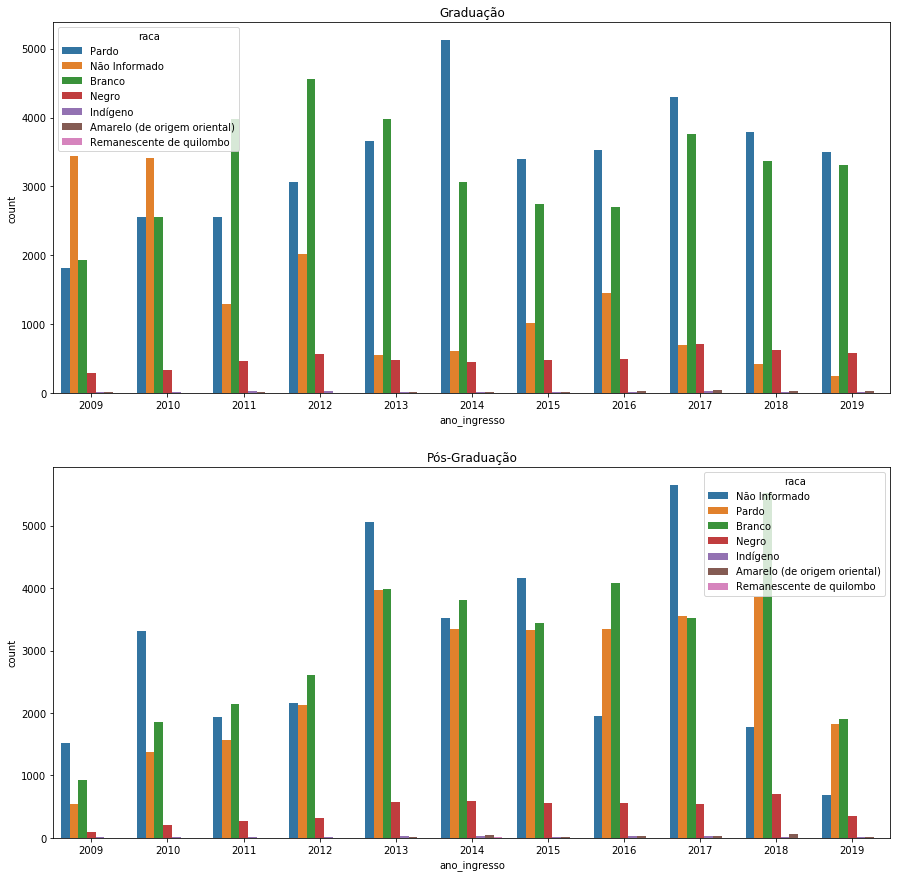

In [0]:
#etnias = dados_ufrn["raca"].value_counts().index 

fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.countplot(x = 'ano_ingresso', hue = 'raca', data = graduacao, ax=ax[0])
sns.countplot(x = 'ano_ingresso', hue = 'raca', data = pos_grad, ax=ax[1])

ax[0].set_title("Graduação")
ax[1].set_title("Pós-Graduação")
plt.show()



Text(0, 0.5, ' ')

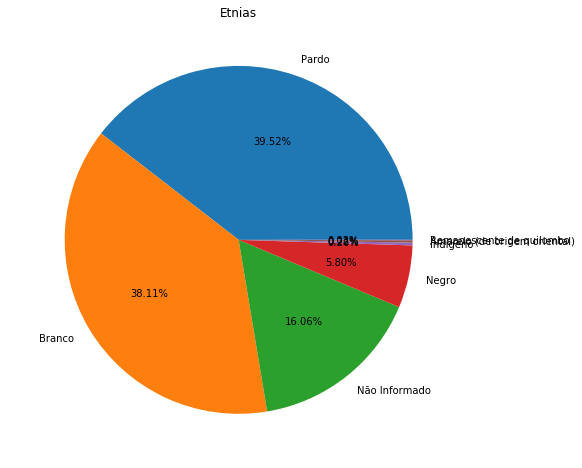

In [0]:
graduacao["raca"].value_counts().plot.pie(figsize=(8,8), autopct = '%.2f%%', 
                                            title = "Etnias")
plt.ylabel(" ")

É tangível que a referência histórica faz valer a desigualdade dentro dos centro acadêmicos em termos de oportunidade, pois brancos e pardos continuam sendo a esmagadora maioria presente na Universidade Federal do Rio Grande do Norte, transformando a educação básica de qualidade, igualmente mais frequentada por pessoas de pele clara, em índices repercutidos no ensino superior.